In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFpr

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

# Data processing

In [2]:
HouseData = pd.read_csv('./HouseData.csv',encoding = "ISO-8859-1")
FullData = pd.read_csv('./Property_Assessment_Data__2012_-_2019_.csv',encoding = "ISO-8859-1")

E:\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (2,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
FullData.shape

(2975436, 21)

In [4]:
FullData = FullData.loc[FullData.loc[:,'Assessment Year'] == 2016,:]

In [5]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62603 entries, 0 to 62602
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  62603 non-null  int64  
 1   taxroll_number              62603 non-null  int64  
 2   property_type               62603 non-null  int64  
 3   effective_build_year        62603 non-null  int64  
 4   net_area                    62603 non-null  float64
 5   basement_finished           62603 non-null  int64  
 6   has_garage                  62603 non-null  int64  
 7   has_fireplace               62603 non-null  int64  
 8   assessed_value              62603 non-null  float64
 9   fully_taxable               62603 non-null  int64  
 10  fully_complete              62603 non-null  int64  
 11  building_count              62603 non-null  int64  
 12  walkout_basement            62603 non-null  int64  
 13  air_conditioning            626

In [6]:
FullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381025 entries, 20 to 2951154
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Account Number        381025 non-null  int64  
 1   Assessment Year       381025 non-null  int64  
 2   Suite                 76645 non-null   object 
 3   House Number          342629 non-null  float64
 4   Street Name           342629 non-null  object 
 5   Legal Description     376205 non-null  object 
 6   Latitude              379807 non-null  float64
 7   Longitude             379807 non-null  float64
 8   Point Location        379807 non-null  object 
 9   Neighbourhood         381025 non-null  object 
 10  Actual Year Built     358087 non-null  float64
 11  Garage                381025 non-null  object 
 12  Zoning                381002 non-null  object 
 13  Lot Size              378133 non-null  float64
 14  Assessed Value        381025 non-null  float64
 15

In [7]:
FullData.rename(columns={'Account Number':'taxroll_number', 'Assessed Value':'Assessed Value 2016'}, \
                inplace = True)

In [8]:
FullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381025 entries, 20 to 2951154
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   taxroll_number        381025 non-null  int64  
 1   Assessment Year       381025 non-null  int64  
 2   Suite                 76645 non-null   object 
 3   House Number          342629 non-null  float64
 4   Street Name           342629 non-null  object 
 5   Legal Description     376205 non-null  object 
 6   Latitude              379807 non-null  float64
 7   Longitude             379807 non-null  float64
 8   Point Location        379807 non-null  object 
 9   Neighbourhood         381025 non-null  object 
 10  Actual Year Built     358087 non-null  float64
 11  Garage                381025 non-null  object 
 12  Zoning                381002 non-null  object 
 13  Lot Size              378133 non-null  float64
 14  Assessed Value 2016   381025 non-null  float64
 15

In [9]:
AssessedValue_2016 = FullData.loc[:,['taxroll_number','Assessed Value 2016']]

In [10]:
AssessedValue_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381025 entries, 20 to 2951154
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   taxroll_number       381025 non-null  int64  
 1   Assessed Value 2016  381025 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB


In [11]:
AssessedValue_2016.to_csv('F:\ECE 625\project\ECE_625_project\AssessedValue_2016.csv')

In [12]:
HouseData.shape

(62603, 18)

In [13]:
NewHouseData = pd.merge(HouseData,AssessedValue_2016,how='left', on = 'taxroll_number',\
                        sort = False, copy = False)

In [14]:
NewHouseData.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 62603 entries, 0 to 62602
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  62603 non-null  int64  
 1   taxroll_number              62603 non-null  int64  
 2   property_type               62603 non-null  int64  
 3   effective_build_year        62603 non-null  int64  
 4   net_area                    62603 non-null  float64
 5   basement_finished           62603 non-null  int64  
 6   has_garage                  62603 non-null  int64  
 7   has_fireplace               62603 non-null  int64  
 8   assessed_value              62603 non-null  float64
 9   fully_taxable               62603 non-null  int64  
 10  fully_complete              62603 non-null  int64  
 11  building_count              62603 non-null  int64  
 12  walkout_basement            62603 non-null  int64  
 13  air_conditioning            626

In [15]:
NewHouseData.isnull().sum().sort_values(ascending=False)

Assessed Value 2016           24
fully_complete                 0
lat                            0
lon                            0
tot_gross_area_description     0
site_coverage                  0
air_conditioning               0
walkout_basement               0
building_count                 0
Unnamed: 0                     0
taxroll_number                 0
assessed_value                 0
has_fireplace                  0
has_garage                     0
basement_finished              0
net_area                       0
effective_build_year           0
property_type                  0
fully_taxable                  0
dtype: int64

In [16]:
NewHouseData = NewHouseData.dropna()
NewHouseData.isnull().sum().sort_values(ascending=False)

Unnamed: 0                    0
fully_complete                0
lat                           0
lon                           0
tot_gross_area_description    0
site_coverage                 0
air_conditioning              0
walkout_basement              0
building_count                0
fully_taxable                 0
taxroll_number                0
assessed_value                0
has_fireplace                 0
has_garage                    0
basement_finished             0
net_area                      0
effective_build_year          0
property_type                 0
Assessed Value 2016           0
dtype: int64

In [17]:
NewHouseData.shape

(62579, 19)

In [18]:
NewHouseData['prediction'] = ''

In [19]:
NewHouseData['Value change'] = ''

In [20]:
NewHouseData['Value change'] = NewHouseData.apply(\
                        lambda x: x['Assessed Value 2016'] - x['assessed_value'], axis=1)

In [21]:
NewHouseData.loc[NewHouseData['Value change'] > 0,'prediction']=1
NewHouseData.loc[NewHouseData['Value change'] < 0,'prediction']=-1
NewHouseData.loc[NewHouseData['Value change'] == 0,'prediction']=0
NewHouseData['prediction']=NewHouseData['prediction'].astype('int')

In [284]:
NewHouseData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61281 entries, 0 to 62602
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  61281 non-null  int64  
 1   taxroll_number              61281 non-null  int64  
 2   property_type               61281 non-null  int64  
 3   effective_build_year        61281 non-null  int64  
 4   net_area                    61281 non-null  float64
 5   basement_finished           61281 non-null  int64  
 6   has_garage                  61281 non-null  int64  
 7   has_fireplace               61281 non-null  int64  
 8   assessed_value              61281 non-null  float64
 9   fully_taxable               61281 non-null  int64  
 10  fully_complete              61281 non-null  int64  
 11  building_count              61281 non-null  int64  
 12  walkout_basement            61281 non-null  int64  
 13  air_conditioning            612

In [23]:
NewHouseData.shape

(62579, 21)

In [24]:
NewHouseData = NewHouseData.loc[NewHouseData.loc[:,'Value change'] != 0,:]

In [25]:
NewHouseData.describe()

,Unnamed: 0,taxroll_number,property_type,effective_build_year,net_area,basement_finished,has_garage,has_fireplace,assessed_value,fully_taxable,...,building_count,walkout_basement,air_conditioning,site_coverage,tot_gross_area_description,lon,lat,Assessed Value 2016,prediction,Value change
count,61281.000000,6.128100e+04,61281.000000,61281.000000,61281.000000,61281.000000,61281.000000,61281.000000,6.128100e+04,61281.000000,...,61281.000000,61281.000000,61281.000000,61281.000000,61281.000000,61281.000000,61281.000000,6.128100e+04,61281.000000,6.128100e+04
mean,35257.473654,7.020721e+06,2.341231,1986.849056,381.030083,0.448296,0.787650,0.613126,9.001669e+05,0.991482,...,1.070577,0.041971,0.093634,0.267357,450.919714,-113.515942,53.516595,9.227661e+05,0.330690,2.259926e+04
std,20481.541198,3.280819e+06,0.834448,18.444279,1882.884291,0.497324,0.408974,0.487038,7.665389e+06,0.091901,...,0.782996,0.200524,0.291322,0.177250,2265.029862,0.086844,0.067467,7.154532e+06,0.943747,8.250806e+05
min,0.000000,1.001163e+06,1.000000,1904.000000,2.000000,0.000000,0.000000,0.000000,5.500000e+03,0.000000,...,1.000000,0.000000,0.000000,0.000000,2.000000,-113.712894,53.396061,0.000000e+00,-1.000000,-1.589325e+08
25%,17328.000000,3.926334e+06,2.000000,1974.000000,109.220000,0.000000,1.000000,0.000000,3.430000e+05,1.000000,...,1.000000,0.000000,0.000000,0.190000,147.000000,-113.581567,53.461123,3.500000e+05,-1.000000,-3.000000e+03
50%,35347.000000,8.375057e+06,2.000000,1987.000000,142.940000,0.000000,1.000000,1.000000,4.260000e+05,1.000000,...,1.000000,0.000000,0.000000,0.260000,185.000000,-113.517654,53.504057,4.335000e+05,1.000000,4.500000e+03
75%,52840.000000,1.000713e+07,2.000000,2004.000000,203.500000,1.000000,1.000000,1.000000,5.680000e+05,1.000000,...,1.000000,0.000000,0.000000,0.320000,250.000000,-113.439121,53.576861,5.685000e+05,1.000000,1.150000e+04
max,71521.000000,1.069713e+07,6.000000,2014.000000,119965.000000,1.000000,1.000000,1.000000,1.527078e+09,1.000000,...,84.000000,1.000000,1.000000,9.990000,201260.000000,-113.281236,53.715149,1.368145e+09,1.000000,2.813900e+07


In [26]:
NewHouseData.shape

(61281, 21)

In [27]:
HouseData = NewHouseData

In [167]:
HouseData.to_csv('F:\ECE 625\project\ECE_625_project\PredictData(Task_2).csv')

# Object_1(Use assessed value)

In [245]:
X = HouseData.loc[:,['property_type','effective_build_year','net_area','basement_finished',\
'has_garage','has_fireplace','fully_taxable','fully_complete','building_count','walkout_basement'\
    ,'air_conditioning','site_coverage','tot_gross_area_description','assessed_value','lon','lat']]
Y = HouseData['prediction']
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.1, random_state = 8)

In [246]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)  

In [247]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(55152, 16) (55152,) (6129, 16) (6129,)


In [248]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
import matplotlib.pyplot as plt
Model_accuracy = []
Model_name = []

## Logistic Regression 

In [249]:
LogisticReg = linear_model.LogisticRegression(penalty = 'l2',solver = 'lbfgs')
LogisticReg.fit(X_train,Y_train)

Logistic_pred = LogisticReg.predict(X_test)

Logistic_cm = confusion_matrix(Y_test, Logistic_pred)

print("Model accuracity:",accuracy_score(Y_test,Logistic_pred))
Model_accuracy.append(accuracy_score(Y_test,Logistic_pred))
Model_name.append('Logistic Regression')

pd.DataFrame(Logistic_cm)

Model accuracity: 0.6839614945341818


,0,1
0,276,1751
1,186,3916


In [250]:
Logistic_scores = cross_val_score(LogisticReg,X_test,Y_test,cv=10)
Logistic_Dscore = cross_val_predict(LogisticReg, X_test, Y_test, cv=10, \
                                    method="decision_function")
Logistic_f1 = f1_score(Y_test, Logistic_pred)

## LinearSVC

In [251]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split as ts


In [252]:
LinearSVC = svm.LinearSVC()
LinearSVC.fit(X_train,Y_train)
SVC_pred = LinearSVC.predict(X_test)

SVC_cm = confusion_matrix(Y_test, SVC_pred)

print("Model accuracy:",accuracy_score(Y_test,SVC_pred))
Model_accuracy.append(accuracy_score(Y_test,SVC_pred))
Model_name.append('LinearSVC')

pd.DataFrame(SVC_cm)

Model accuracy: 0.677761461902431


E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,0,1
0,192,1835
1,140,3962


In [253]:
SVC_scores = cross_val_score(LinearSVC,X_test,Y_test,cv=10)
SVC_Dscore = cross_val_predict(LinearSVC, X_test, Y_test, cv=10, \
                                    method="decision_function")
SVC_f1 = f1_score(Y_test, SVC_pred)

E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

## Decision Tree

In [254]:
from sklearn import tree
Decision_Tree = tree.DecisionTreeClassifier()
Decision_Tree.fit(X_train,Y_train)

DT_pred = Decision_Tree.predict(X_test)

DT_cm = confusion_matrix(Y_test, DT_pred)

print("Model accuracity:",accuracy_score(Y_test,DT_pred))

Model_accuracy.append(accuracy_score(Y_test,DT_pred))
Model_name.append('Decision Tree')

pd.DataFrame(DT_cm)

Model accuracity: 0.8577255669766684


,0,1
0,1574,453
1,419,3683


In [255]:
DT_scores = cross_val_score(Decision_Tree,X_test,Y_test,cv=10)

In [256]:
DT_Dscore = Decision_Tree.predict_proba(X_test)

In [257]:
DT_f1 = f1_score(Y_test, DT_pred)

## Random Forest 

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

RFC = RandomForestClassifier(n_estimators=150, max_depth=30)
RFC.fit(X_train,Y_train)

RFC_pred = RFC.predict(X_test)

RFC_cm = confusion_matrix(Y_test, RF_pred)

print("Model accuracity (random forest scikit-learn):",accuracy_score(Y_test,RF_pred))
Model_accuracy.append(accuracy_score(Y_test,RF_pred))
Model_name.append('Random Forest')


pd.DataFrame(RFC_cm)

Model accuracity (random forest scikit-learn): 0.8880730951215533


,0,1
0,1611,416
1,270,3832


In [259]:
RFC_scores = cross_val_score(RFC,X_test,Y_test,cv=10)

In [260]:
RFC_Dscore = RFC.predict_proba(X_test)

In [261]:
RFC_f1 = f1_score(Y_test, RFC_pred)

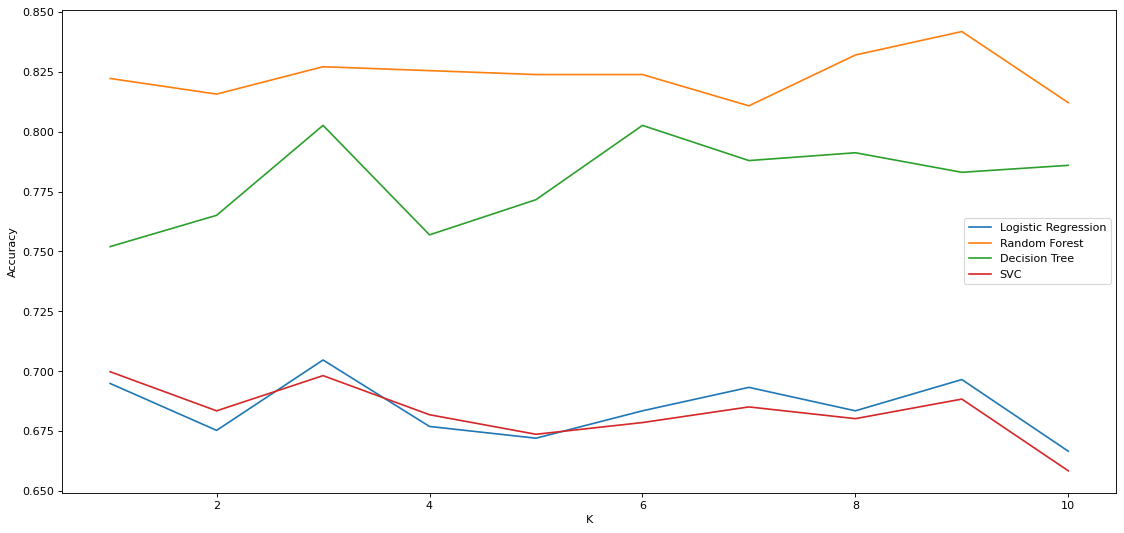

In [262]:
k = range(1,11)
fig = plt.figure(num=1, figsize=(17, 8),dpi=80)
plt.plot(k,Logistic_scores,label = 'Logistic Regression')
plt.plot(k,RFC_scores,label = 'Random Forest')
plt.plot(k,DT_scores,label = 'Decision Tree')
plt.plot(k,SVC_scores,label = 'SVC')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()

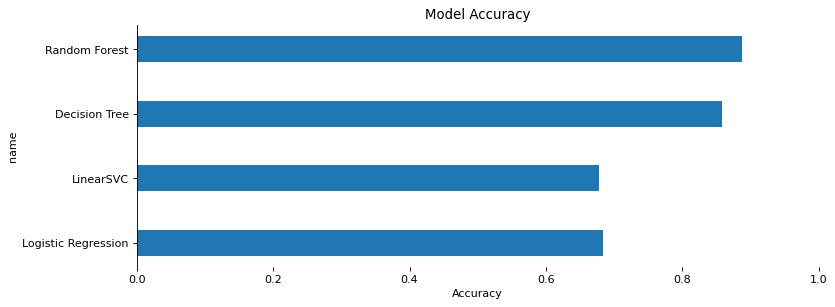

In [263]:
f,fig = plt.subplots(num=1, figsize=(11, 4),dpi=80)
fig.barh(Model_name, Model_accuracy,tick_label=Model_name,height = 0.4)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['bottom'].set_visible(False)

plt.ylabel('name')
plt.xlabel('Accuracy')
plt.title("Model Accuracy")
plt.xlim(0,1)
plt.show()

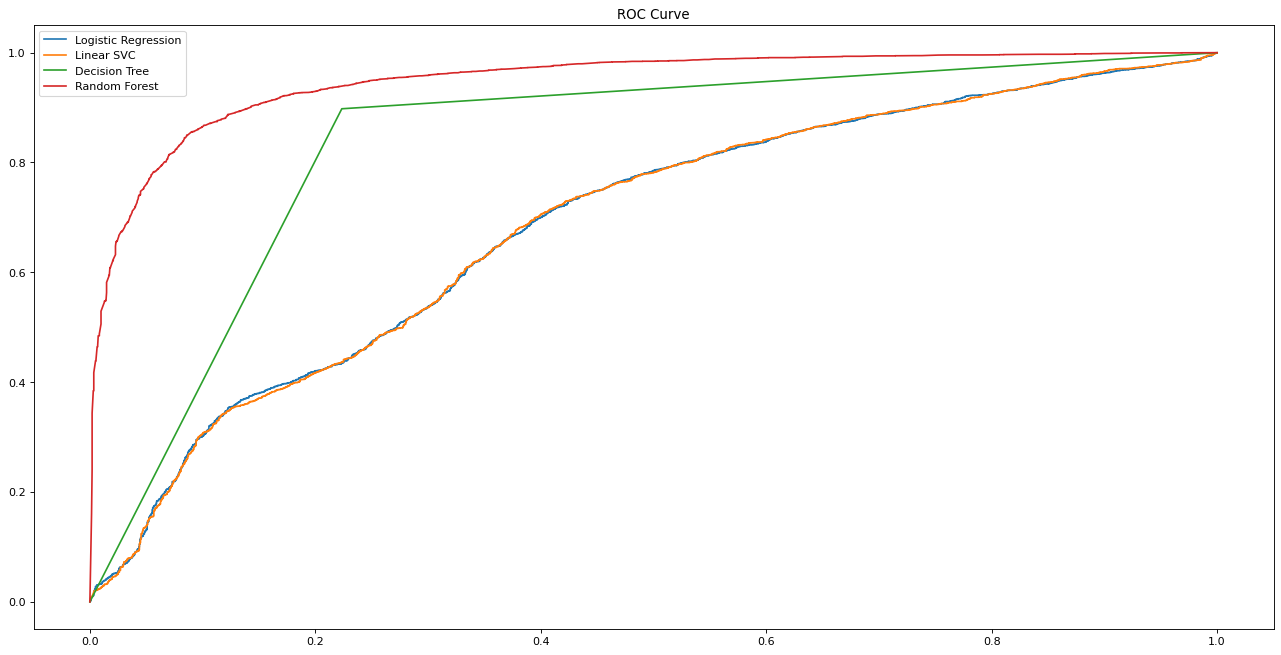

In [264]:
from sklearn.metrics import roc_curve
fig = plt.figure(num=1, figsize=(20, 10),dpi=80)

fpr,tpr,threshold = roc_curve(Y_test,Logistic_Dscore)
plt.plot(fpr[:-1],tpr[:-1],label = 'Logistic Regression')

fpr,tpr,threshold = roc_curve(Y_test,SVC_Dscore)
plt.plot(fpr[:-1],tpr[:-1],label = 'Linear SVC')

fpr,tpr,threshold = roc_curve(Y_test,DT_Dscore[:,1])
plt.plot(fpr,tpr,label = 'Decision Tree')

fpr,tpr,threshold = roc_curve(Y_test,RFC_Dscore[:,1])
plt.plot(fpr,tpr,label = 'Random Forest')

plt.title('ROC Curve')
plt.legend()
plt.show()


In [265]:
result = pd.DataFrame(columns=('Logistic Regression','Random Forest','Decision Tree','SVC'), \
                      index = ['Accuracy', 'Accuracy(10 fold cross validation)','f1 score'])

In [266]:
result['Logistic Regression'] = [accuracy_score(Y_test,Logistic_pred),Logistic_scores.max(),\
                                Logistic_f1]

result['Random Forest'] = [accuracy_score(Y_test,RFC_pred), RFC_scores.max(), RFC_f1]

result['Decision Tree'] = [accuracy_score(Y_test,DT_pred), DT_scores.max(), DT_f1]

result['SVC'] = [accuracy_score(Y_test,SVC_pred), SVC_scores.max(), SVC_f1]

In [267]:
result

,Logistic Regression,Random Forest,Decision Tree,SVC
Accuracy,0.683961,0.886605,0.857726,0.677761
Accuracy(10 fold cross validation),0.704731,0.841762,0.802610,0.699837
f1 score,0.801720,0.916537,0.894149,0.800485


# Objective_2(Don't use assessed value)

In [268]:
X = HouseData.loc[:,['property_type','effective_build_year','net_area','basement_finished',\
'has_garage','has_fireplace','fully_taxable','fully_complete','building_count','walkout_basement'\
    ,'air_conditioning','site_coverage','tot_gross_area_description','lon','lat']]
Y = HouseData['prediction']
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.1, random_state = 8)

In [269]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)  
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Model_accuracy = []
Model_name = []

(55152, 15) (55152,) (6129, 15) (6129,)


## Logistic Regression 

In [270]:
LogisticReg = linear_model.LogisticRegression(penalty = 'l2',solver = 'lbfgs')
LogisticReg.fit(X_train,Y_train)

Logistic_pred = LogisticReg.predict(X_test)

Logistic_cm = confusion_matrix(Y_test, Logistic_pred)

print("Model accuracity:",accuracy_score(Y_test,Logistic_pred))
Model_accuracy.append(accuracy_score(Y_test,Logistic_pred))
Model_name.append('Logistic Regression')

pd.DataFrame(Logistic_cm)

Model accuracity: 0.6836351770272475


,0,1
0,273,1754
1,185,3917


In [271]:
Logistic_scores = cross_val_score(LogisticReg,X_test,Y_test,cv=10)
Logistic_Dscore = cross_val_predict(LogisticReg, X_test, Y_test, cv=10, \
                                    method="decision_function")
Logistic_f1 = f1_score(Y_test, Logistic_pred)

## LinearSVC

In [272]:
LinearSVC = svm.LinearSVC()
LinearSVC.fit(X_train,Y_train)
SVC_pred = LinearSVC.predict(X_test)

SVC_cm = confusion_matrix(Y_test, SVC_pred)

print("Model accuracy:",accuracy_score(Y_test,SVC_pred))
Model_accuracy.append(accuracy_score(Y_test,SVC_pred))
Model_name.append('LinearSVC')

pd.DataFrame(SVC_cm)

Model accuracy: 0.6780877794093653


E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,0,1
0,192,1835
1,138,3964


In [273]:
SVC_scores = cross_val_score(LinearSVC,X_test,Y_test,cv=10)
SVC_Dscore = cross_val_predict(LinearSVC, X_test, Y_test, cv=10, \
                                    method="decision_function")
SVC_f1 = f1_score(Y_test, SVC_pred)

E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

## Decision Tree

In [274]:
Decision_Tree = tree.DecisionTreeClassifier()
Decision_Tree.fit(X_train,Y_train)

DT_pred = Decision_Tree.predict(X_test)

DT_cm = confusion_matrix(Y_test, DT_pred)

print("Model accuracity:",accuracy_score(Y_test,DT_pred))

Model_accuracy.append(accuracy_score(Y_test,DT_pred))
Model_name.append('Decision Tree')

pd.DataFrame(DT_cm)

Model accuracity: 0.8471202480013053


,0,1
0,1579,448
1,489,3613


In [275]:
DT_scores = cross_val_score(Decision_Tree,X_test,Y_test,cv=10)
DT_Dscore = Decision_Tree.predict_proba(X_test)
DT_f1 = f1_score(Y_test, DT_pred)

## Random Forest 

In [276]:
RFC = RandomForestClassifier(n_estimators=150, max_depth=30)
RFC.fit(X_train,Y_train)

RFC_pred = RFC.predict(X_test)

RFC_cm = confusion_matrix(Y_test, RF_pred)

print("Model accuracity (random forest scikit-learn):",accuracy_score(Y_test,RF_pred))
Model_accuracy.append(accuracy_score(Y_test,RF_pred))
Model_name.append('Random Forest')


pd.DataFrame(RFC_cm)

Model accuracity (random forest scikit-learn): 0.8880730951215533


,0,1
0,1611,416
1,270,3832


In [277]:
RFC_scores = cross_val_score(RFC,X_test,Y_test,cv=10)
RFC_Dscore = RFC.predict_proba(X_test)
RFC_f1 = f1_score(Y_test, RFC_pred)

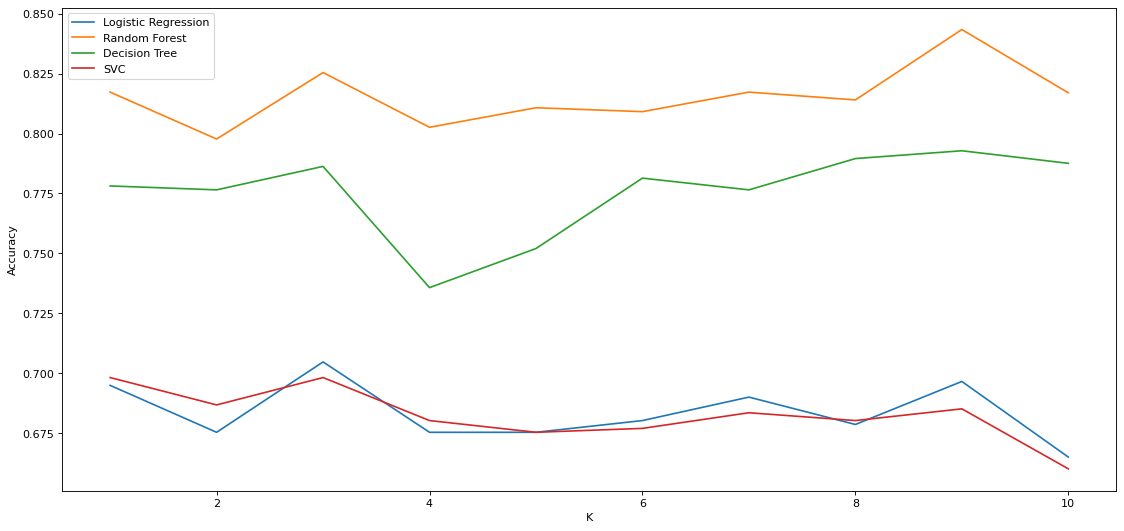

In [278]:
k = range(1,11)
fig = plt.figure(num=1, figsize=(17, 8),dpi=80)
plt.plot(k,Logistic_scores,label = 'Logistic Regression')
plt.plot(k,RFC_scores,label = 'Random Forest')
plt.plot(k,DT_scores,label = 'Decision Tree')
plt.plot(k,SVC_scores,label = 'SVC')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()

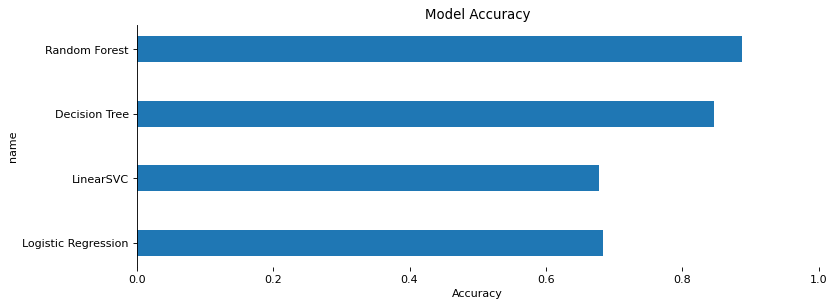

In [279]:
f,fig = plt.subplots(num=1, figsize=(11, 4),dpi=80)
fig.barh(Model_name, Model_accuracy,tick_label=Model_name,height = 0.4)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['bottom'].set_visible(False)

plt.ylabel('name')
plt.xlabel('Accuracy')
plt.title("Model Accuracy")
plt.xlim(0,1)
plt.show()

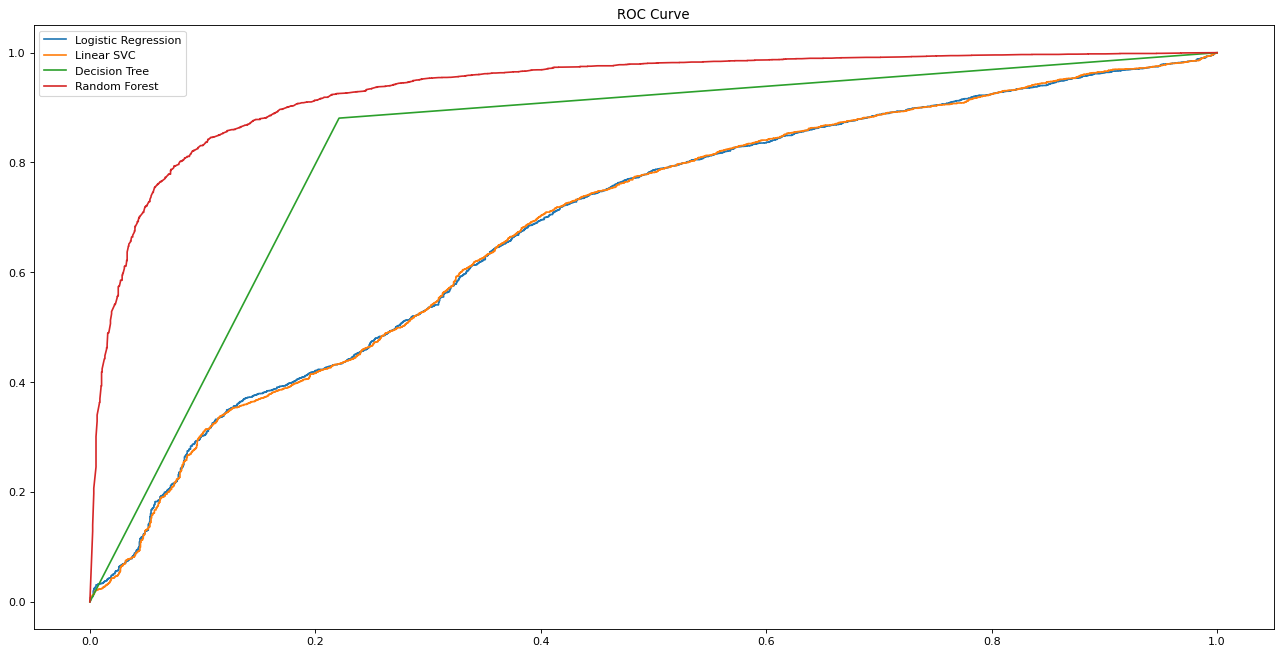

In [280]:
from sklearn.metrics import roc_curve
fig = plt.figure(num=1, figsize=(20, 10),dpi=80)

fpr,tpr,threshold = roc_curve(Y_test,Logistic_Dscore)
plt.plot(fpr[:-1],tpr[:-1],label = 'Logistic Regression')

fpr,tpr,threshold = roc_curve(Y_test,SVC_Dscore)
plt.plot(fpr[:-1],tpr[:-1],label = 'Linear SVC')

fpr,tpr,threshold = roc_curve(Y_test,DT_Dscore[:,1])
plt.plot(fpr,tpr,label = 'Decision Tree')

fpr,tpr,threshold = roc_curve(Y_test,RFC_Dscore[:,1])
plt.plot(fpr,tpr,label = 'Random Forest')

plt.title('ROC Curve')
plt.legend()
plt.show()

In [281]:
result = pd.DataFrame(columns=('Logistic Regression','Random Forest','Decision Tree','SVC'), \
                      index = ['Accuracy', 'Accuracy(10 fold cross validation)','f1 score'])

In [282]:
result['Logistic Regression'] = [accuracy_score(Y_test,Logistic_pred),Logistic_scores.max(),\
                                Logistic_f1]

result['Random Forest'] = [accuracy_score(Y_test,RFC_pred), RFC_scores.max(), RFC_f1]

result['Decision Tree'] = [accuracy_score(Y_test,DT_pred), DT_scores.max(), DT_f1]

result['SVC'] = [accuracy_score(Y_test,SVC_pred), SVC_scores.max(), SVC_f1]

In [283]:
result

,Logistic Regression,Random Forest,Decision Tree,SVC
Accuracy,0.683635,0.877305,0.847120,0.678088
Accuracy(10 fold cross validation),0.704731,0.843393,0.792822,0.698206
f1 score,0.801596,0.909897,0.885214,0.800727
